### This Jupyter Notebook is used to try the rest of the code.

In [17]:
import gym_examples
import gym
from pdb import set_trace
import time

env = gym.make(
    "gym_examples/Pedantle-v0", 
    render_mode="human", 
    test_model=True, 
    wiki_file="/home/gabriel/cours/RL/projet/wikipedia_april.csv",
    )

env.action_space.seed(42)

observation = env.reset(seed=42)

while True:
    user_input = input("Type 'Z' to continue: ")
    if user_input == "Z":
        break
    time.sleep(2)

actions = ["and","fourth","be","the","of","year","is","be","for","day","always","often","between","come","can","do","in","common","start","first","second","April"]
for i in range(20):
    action = actions[i]
    time.sleep(2)
    observation, reward, terminated, _, _ = env.step(action)

    if terminated:
        observation, info = env.reset()

env.close()

Loading small embedding model for testing


/home/gabriel/.pyenv/versions/3.10.13/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/gabriel/.pyenv/versions/3.10.13/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:146: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/gabriel/.pyenv/versions/3.10.13/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/gabriel/.pyenv/versions/3.10.13/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the obser

In [9]:
import pygame, sys
pygame.quit()
sys.exit()

SystemExit: 

/home/gabriel/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
from gensim.models import KeyedVectors, word2vec
EMBEDDING_FILE = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
king, queen = model["month"], model["April"]
cosine_similarity([king], [queen]).item()

0.5571293234825134

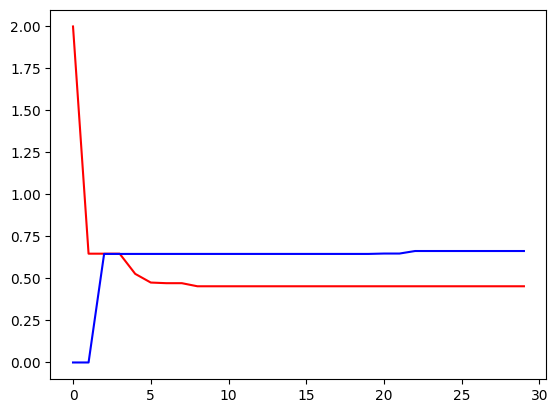

0.5585357993841171


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("threshold.csv")
thresholds_max = [2]
thresholds_min = [0]
for i, row in df.iterrows():
    proposed_word, true_word = row["proposed_word"], row["true_word"]
    proposed_word, true_word = model[proposed_word], model[true_word]
    similarity = cosine_similarity([proposed_word], [true_word]).item()
    score = df["match"][i]
    if score:
        if similarity < thresholds_max[-1]:
            thresholds_max.append(similarity)
        else:
            thresholds_max.append(thresholds_max[-1])
        thresholds_min.append(thresholds_min[-1])
    else:
        if similarity > thresholds_min[-1]:
            thresholds_min.append(similarity)
        else:
            thresholds_min.append(thresholds_min[-1])
        thresholds_max.append(thresholds_max[-1])

plt.plot(thresholds_max, color="red")
plt.plot(thresholds_min, color="blue")
plt.show()
import numpy as np 
print(np.mean((thresholds_max[-1], thresholds_min[-1])))

In [52]:
cosine_similarity([model["he"]],[model["they"]]).item()

0.4536105692386627